<a href="https://colab.research.google.com/github/kihtrak-tns/Build-Self-Driving-car-using-NVIDIA-Jetson-Nano/blob/master/Convolutional_Neural_Networks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.utils.np_utils import to_categorical
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers import Dropout
from keras.models import Model
import random

Using TensorFlow backend.


In [0]:
np.random.seed(0)

In [0]:
(X_train, y_train), (X_test, y_test)= mnist.load_data()
 
print(X_train.shape)
print(X_test.shape)
assert(X_train.shape[0] == y_train.shape[0]), "The number of images is not equal to the number of labels."
assert(X_train.shape[1:] == (28,28)), "The dimensions of the images are not 28 x 28."
assert(X_test.shape[0] == y_test.shape[0]), "The number of images is not equal to the number of labels."
assert(X_test.shape[1:] == (28,28)), "The dimensions of the images are not 28 x 28."

11493376/11490434 [==============================] - 0s 0us/step
(60000, 28, 28)
(10000, 28, 28)


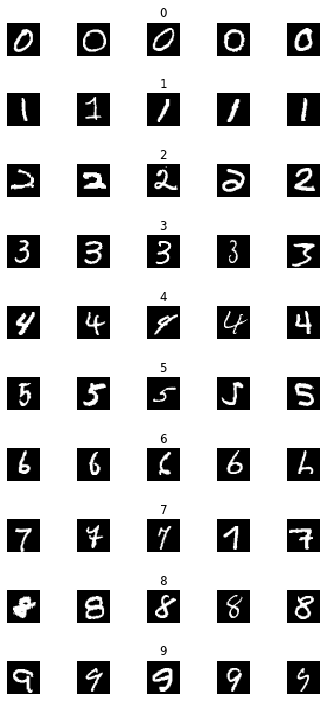

In [0]:
num_of_samples=[]
 
cols = 5
num_classes = 10
 
fig, axs = plt.subplots(nrows=num_classes, ncols=cols, figsize=(5,10))
fig.tight_layout()
 
for i in range(cols):
    for j in range(num_classes):
      x_selected = X_train[y_train == j]
      axs[j][i].imshow(x_selected[random.randint(0,(len(x_selected) - 1)), :, :], cmap=plt.get_cmap('gray'))
      axs[j][i].axis("off")
      if i == 2:
        axs[j][i].set_title(str(j))
        num_of_samples.append(len(x_selected))

## We flatten out our data into 1D arrays to feed them into the feedforward neural network whereas we reshaped them in MNIST for matrix mul

[5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949]


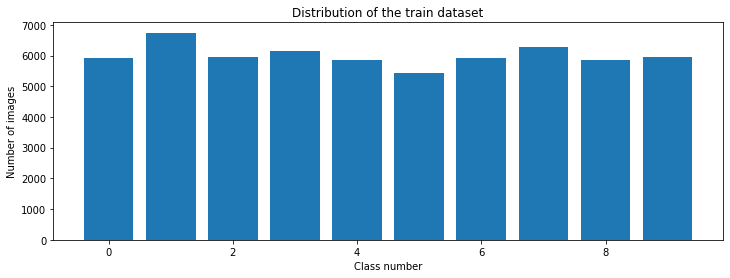

In [0]:
print(num_of_samples)
plt.figure(figsize=(12, 4))
plt.bar(range(0, num_classes), num_of_samples)
plt.title("Distribution of the train dataset")
plt.xlabel("Class number")
plt.ylabel("Number of images")
plt.show()
 


X_train = X_train.reshape(60000, 28, 28, 1)
X_test = X_test.reshape(10000, 28, 28, 1)


y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)
 
X_train = X_train/255
X_test = X_test/255



 -> We use 30 filters in our model, as the number increases so does the computational complexity.

 -> Each filter will have a 5x5 format of parameter values. The input will have a 28x28 image with a single layer depth. 
 
  -> Each filter has 25 elements: 30 * 25 = 750 + 30 bias (for each of the filter) = 780 elements. 

  ->  The smaller the stride, the more information it retains as more convolutional operations are conducted.  


->  With padding, we preserve the spatial dimensionality; but in our case our images have information in the center and the borders dont give us much information about the image.

-> In the beginning, the 28x28 image is scaled down to 24x24 with 30 layers of depth. After the first round of pooling with 2x2 filter, the image is further scaled down to half, 12x12. 

-> In the second round, each filter is fed with 30 convoluted layers, hence 15 * 30 * 3 * 3 + 15 bias = 4065 parameters. 

-> We flatten the array to feed it into our neural network; and we choose an arbitary number of nodes

--> We keep our droupouts in the layer that has more number of parameters to avoid overfitting. Hence we place our dropout layer between fully connected layer. 0.5 is chosen as recommended by researchers who found it to avoid overfitting



In [0]:
#define the Lenet_model_function

def leNet_model() :
  model = Sequential()
  model.add(Conv2D(30, (5, 5), input_shape = (28, 28, 1), activation='relu'))
  model.add(MaxPooling2D(pool_size=(2,2)))
  model.add(Conv2D(15, (3, 3), activation='relu'))
  model.add(MaxPooling2D(pool_size=(2,2)))
  model.add(Flatten())
  model.add(Dense(500, activation='relu'))
  model.add(Dropout(0.5))
  model.add(Dense(num_classes, activation='softmax'))
  model.compile(Adam(lr=0.01), loss='categorical_crossentropy', metrics=['accuracy'])
  return model


In [0]:
model = leNet_model()
print(model.summary())






Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 24, 24, 30)        780       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 30)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 10, 10, 15)        4065      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 15)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 375)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 500)               188000   

In [0]:
history = model.fit(np.array(X_train), np.array(y_train), epochs=10, validation_split=0.1, batch_size=400, verbose=1, shuffle=1)

Train on 54000 samples, validate on 6000 samples
Epoch 1/10
54000/54000 [==============================] - 1s 23us/step - loss: 0.0391 - acc: 0.9880 - val_loss: 0.0331 - val_acc: 0.9900
Epoch 2/10
54000/54000 [==============================] - 1s 21us/step - loss: 0.0401 - acc: 0.9880 - val_loss: 0.0364 - val_acc: 0.9913
Epoch 3/10
54000/54000 [==============================] - 1s 22us/step - loss: 0.0377 - acc: 0.9888 - val_loss: 0.0356 - val_acc: 0.9905
Epoch 4/10
54000/54000 [==============================] - 1s 23us/step - loss: 0.0315 - acc: 0.9904 - val_loss: 0.0413 - val_acc: 0.9888
Epoch 5/10
54000/54000 [==============================] - 1s 23us/step - loss: 0.0304 - acc: 0.9907 - val_loss: 0.0450 - val_acc: 0.9900
Epoch 6/10
54000/54000 [==============================] - 1s 22us/step - loss: 0.0351 - acc: 0.9898 - val_loss: 0.0473 - val_acc: 0.9908
Epoch 7/10
54000/54000 [==============================] - 1s 22us/step - loss: 0.0372 - acc: 0.9897 - val_loss: 0.0505 - val_acc:

Text(0.5, 0, 'epoch')

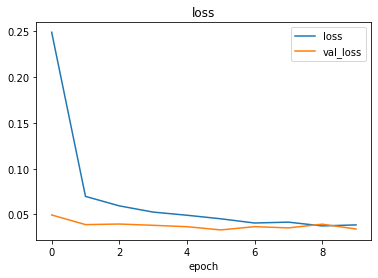

In [0]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['loss', 'val_loss'])
plt.title('loss')
plt.xlabel('epoch')

We've less errors classifying MNIST set in CNN


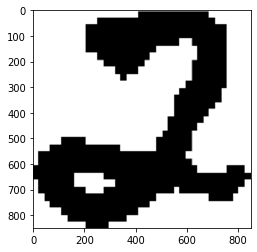

In [0]:
import requests
from PIL import Image
url = 'https://www.researchgate.net/profile/Jose_Sempere/publication/221258631/figure/fig1/AS:305526891139075@1449854695342/Handwritten-digit-2.png'
response = requests.get(url, stream = True)
img = Image.open(response.raw)
plt.imshow(img, cmap=plt.get_cmap('gray'))


In [0]:
import cv2

img_array = np.asarray(img)
resized = cv2.resize(img_array, (28,28))
gray_scale = cv2.cvtColor(resized, cv2.COLOR_BGR2GRAY)
image = cv2.bitwise_not(gray_scale)

In CNN, the image is reshaped to 28 x 28 with a single channel.

In [0]:
image = image/255
image = image.reshape(1, 28, 28, 1)

In [0]:
prediction = model.predict_classes(image)
print("predicted digit:", str(prediction))

predicted digit: [2]


# The Model() (like Sequential())allows us to instantiate layers from pretrained models, allowing to use the sections from pretrained models which we use to read through the outputs of the convoluted layers. It will complete all the calculations by itself and allow us to see exactly what's happening with the parameters between the layers.

-> It takes inputs and outputs of the layers, as arguments. In our case, the input will be the image that is first being fed into the neural network : for layer1.

->for layer2: the inputs remain the same, but the output is now going to be in the second index of the outputs array i.e. after second convolution.

In [0]:
layer1 = Model(inputs=model.layers[0].input, outputs=model.layers[0].output)
layer2 = Model(inputs=model.layers[0].input, outputs=model.layers[2].output)

visual_layer1 = layer1.predict(image)
visual_layer2 = layer2.predict(image)

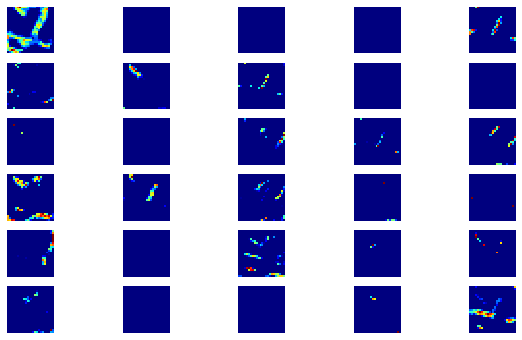

In [0]:
plt.figure(figsize = (10,6))
for i in range(30):
    plt.subplot(6, 5, i+1)
    plt.imshow(visual_layer1[0, :, :, i], cmap = plt.get_cmap('jet'))
    plt.axis('off')
    

The red ones are with highest intensity and the blue ones are with lowest intensity.

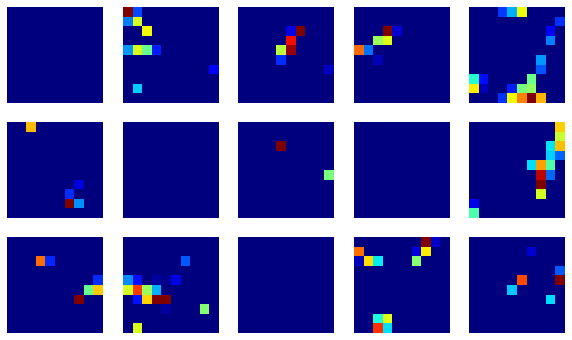

In [0]:
plt.figure(figsize = (10,6))
for i in range(15):
    plt.subplot(3, 5, i+1)
    plt.imshow(visual_layer2[0, :, :, i], cmap = plt.get_cmap('jet'))
    plt.axis('off')
    

The images might seem to have less information but has more features that give a detailed info of the image which gives us a good prediction.